In [1]:
import math
import statistics
import numpy as np
import pandas as pd
import random
import matplotlib
from matplotlib import pyplot
from scipy import stats
from scipy.stats import norm
import scipy as sp
from sklearn import linear_model

In [2]:
import yfinance as yf
import statsmodels.api as sm

In [3]:
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

1. Information Technology: MSFT 1, Apple 2, Alphabet 5, Nvidia 4
2. Health Care: United Health Group 10, Johnson and Johnson 16, Thermo Fisher Scientific 36
3. Financials: JPM 12, Bank of America 29, Goldman 68, Visa 14, Mastercard 18, Paypal 124
4. Real Estate: AMT 83, PLD 72, D.R.Horton DHI199, Realty Income Corporation 204 O, 

In [6]:
apple = yf.download('AAPL', start='2021-01-04', end='2023-01-06')
amazon= yf.download('AMZN', start='2021-01-04', end='2023-01-06')
msft = yf.download('MSFT', start='2021-01-04', end='2023-01-06')
gm = yf.download('GM', start='2021-01-04', end='2023-01-06')
snp500 = yf.download('^GSPC', start='2021-01-04', end='2023-01-06')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
MSFT= yf.download('MSFT', start='2021-01-04', end='2023-01-06')
AAPL= yf.download('AAPL', start='2021-01-04', end='2023-01-06')
GOOGL= yf.download('GOOGL', start='2021-01-04', end='2023-01-06')
NVDA= yf.download('NVDA', start='2021-01-04', end='2023-01-06')
UNH= yf.download('UNH', start='2021-01-04', end='2023-01-06')
TMO= yf.download('TMO', start='2021-01-04', end='2023-01-06')
JNJ= yf.download('JNJ', start='2021-01-04', end='2023-01-06')
CVS= yf.download('CVS', start='2021-01-04', end='2023-01-06')
REGN= yf.download('REGN', start='2021-01-04', end='2023-01-06')
V= yf.download('V', start='2021-01-04', end='2023-01-06')
JPM= yf.download('JPM', start='2021-01-04', end='2023-01-06')
BAC= yf.download('BAC', start='2021-01-04', end='2023-01-06')
MA= yf.download('MA', start='2021-01-04', end='2023-01-06')
PYPL= yf.download('PYPL', start='2021-01-04', end='2023-01-06')
GS= yf.download('GS', start='2021-01-04', end='2023-01-06')

AMT= yf.download('AMT', start='2021-01-04', end='2023-01-06')
PLD= yf.download('PLD', start='2021-01-04', end='2023-01-06')
DHI= yf.download('DHI', start='2021-01-04', end='2023-01-06')
O= yf.download('O', start='2021-01-04', end='2023-01-06')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [18]:
name=[MSFT,AAPL,GOOGL,NVDA,UNH,TMO,JNJ,CVS,REGN,V,JPM,BAC,MA,PYPL,GS,AMT,PLD,DHI,O]
return_list=[]
for i in name:
    return_list.append(np.log(i.Close.pct_change().dropna().values + 1))



In [53]:
name1='PG'
name2='MSFT'
list1=np.log(yf.download(f'{name1}', start='2021-01-04', end='2023-01-03').Close.pct_change().dropna().values + 1)
list2=np.log(yf.download(f'{name2}', start='2021-01-04', end='2023-01-03').Close.pct_change().dropna().values + 1)
correlation_matrix = np.corrcoef(list1, list2)
correlation_coefficient = correlation_matrix[0, 1]
print(f"Correlation Coefficient: {correlation_coefficient}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Correlation Coefficient: 0.3695359086077526


In [64]:
lis=['XOM','C','GOOG','MDLZ']
res=[]
for i in lis:
    temp=[]
    for j in lis:
        list1=np.log(yf.download(f'{i}', start='2021-01-04', end='2023-01-03').Close.pct_change().dropna().values + 1)
        list2=np.log(yf.download(f'{j}', start='2021-01-04', end='2023-01-03').Close.pct_change().dropna().values + 1)
        correlation_matrix = np.corrcoef(list1, list2)
        correlation_coefficient = correlation_matrix[0, 1]
        temp.append(correlation_coefficient)
    print(i,temp,'\n')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
XOM [1.0, 0.48201540893117995, 0.21747400430094635, 0.1564170830065284] 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***

In [65]:
AMGN no
PFE no
DHR:UNH,TMO,ABT
lis=['LLY','UNH','JNJ','MRK','ABBV','TMO','ABT','DHR','PFE','AMGN'] 
lis=['GOOG',"MSFT",'AAPL','NVDA','AMD','TSLA','META'] 
lis=['PG','KO','PEP','MDLZ']
lis=['C','JPM','BAC','GS']
lis=['XOM','CVX','COP','EOG']  



lis=['GOOG','MSFT','AAPL']

lis=['XOM','CVX','COP']
lis=['C','JPM','BAC']
lis=['PG','PEP','MDLZ']


SyntaxError: invalid syntax (590813465.py, line 1)

In [66]:
name1='XOM'
name2=''
list1=np.log(yf.download(f'{name1}', start='2021-01-04', end='2023-01-03').Close.pct_change().dropna().values + 1)
list2=np.log(yf.download(f'{name2}', start='2021-01-04', end='2023-01-03').Close.pct_change().dropna().values + 1)
correlation_matrix = np.corrcoef(list1, list2)
correlation_coefficient = correlation_matrix[0, 1]
print(f"Correlation Coefficient: {correlation_coefficient}")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Correlation Coefficient: 0.3695359086077526


In [71]:
import seaborn as sns

In [126]:
name1='XOM'
name2='PG'
list1=np.log(yf.download(f'{name1}', start='2021-01-04', end='2023-01-03').Close.pct_change().dropna().values + 1)
list2=np.log(yf.download(f'{name2}', start='2021-01-04', end='2023-01-03').Close.pct_change().dropna().values + 1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


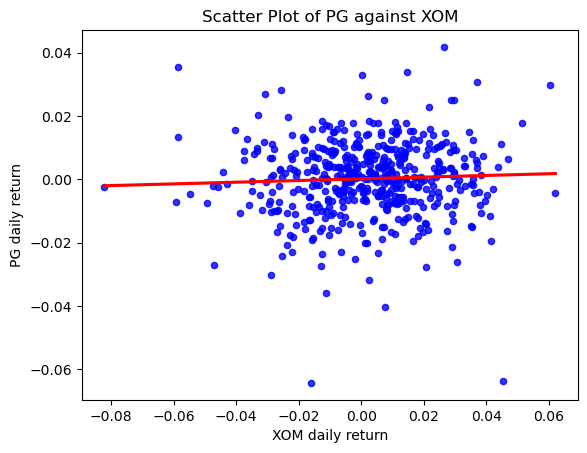

In [127]:
import matplotlib.pyplot as plt

# Example data
x = list1
y = list2

# Create a scatter plot using Seaborn
sns.regplot(x=x, y=y, ci=None ,scatter_kws={'color': 'blue', 's':20}, line_kws={'color': 'red'})

# Add labels and a title
plt.xlabel(f'{name1} daily return')
plt.ylabel(f'{name2} daily return')
plt.title(f'Scatter Plot of {name2} against {name1}')

# Display the plot
plt.show()

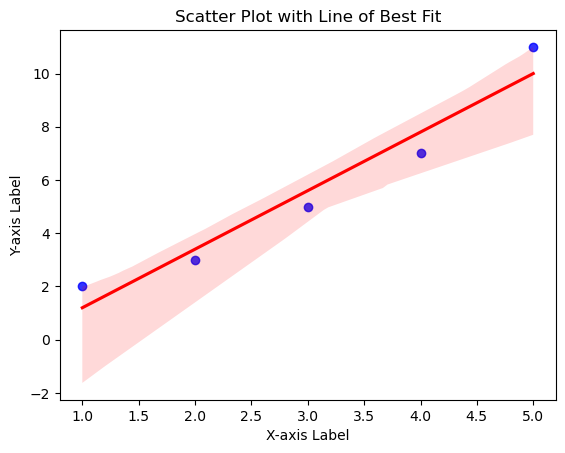

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Create a scatter plot with a line of best fit using Seaborn with different colors
sns.regplot(x=x, y=y, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Add labels and a title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot with Line of Best Fit')

# Display the plot
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


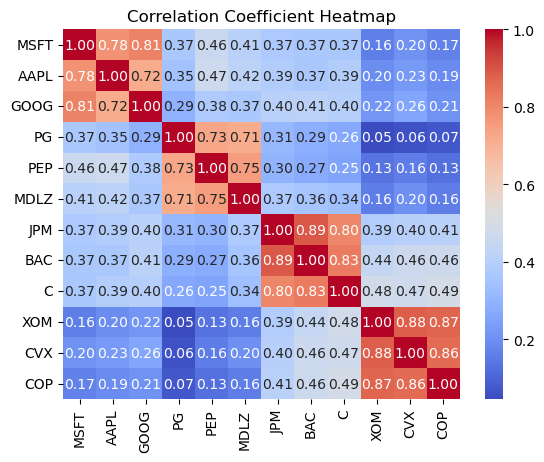

In [147]:






name11='MSFT'
name12='AAPL'
name13='GOOG'
list11=np.log(yf.download(f'{name11}', start='2021-01-04', end='2023-01-03').Close.pct_change().dropna().values + 1)
list12=np.log(yf.download(f'{name12}', start='2021-01-04', end='2023-01-03').Close.pct_change().dropna().values + 1)
list13=np.log(yf.download(f'{name13}', start='2021-01-04', end='2023-01-03').Close.pct_change().dropna().values + 1)





name21='PG'
name22='PEP'
name23='MDLZ'
list21=np.log(yf.download(f'{name21}', start='2021-01-04', end='2023-01-03').Close.pct_change().dropna().values + 1)
list22=np.log(yf.download(f'{name22}', start='2021-01-04', end='2023-01-03').Close.pct_change().dropna().values + 1)
list23=np.log(yf.download(f'{name23}', start='2021-01-04', end='2023-01-03').Close.pct_change().dropna().values + 1)





name31='JPM'
name32='BAC'
name33='C'
list31=np.log(yf.download(f'{name31}', start='2021-01-04', end='2023-01-03').Close.pct_change().dropna().values + 1)
list32=np.log(yf.download(f'{name32}', start='2021-01-04', end='2023-01-03').Close.pct_change().dropna().values + 1)
list33=np.log(yf.download(f'{name33}', start='2021-01-04', end='2023-01-03').Close.pct_change().dropna().values + 1)





name1='XOM'
name2='CVX'
name3='COP'
list1=np.log(yf.download(f'{name1}', start='2021-01-04', end='2023-01-03').Close.pct_change().dropna().values + 1)
list2=np.log(yf.download(f'{name2}', start='2021-01-04', end='2023-01-03').Close.pct_change().dropna().values + 1)
list3=np.log(yf.download(f'{name3}', start='2021-01-04', end='2023-01-03').Close.pct_change().dropna().values + 1)

# Example data
data = {
    name11: list11,
    name12: list12,
    name13: list13,
    name21: list21,
    name22: list22,
    name23: list23,
    name31: list31,
    name32: list32,
    name33: list33,
    name1: list1,
    name2: list2,
    name3: list3,
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the correlation coefficient matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title
plt.title('Correlation Coefficient Heatmap')

# Display the plot
plt.show()

In [148]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
# Add a constant term to the DataFrame for the intercept
# X = sm.add_constant(df)

print("Shape of Y:", Y.shape)
print("Shape of X:", X.shape)
# Fit the linear regression model
model = sm.OLS(Y, X).fit()
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print("VIF Values:")
print(vif_data)

# Display model summary
print("\nModel Summary:")
print(model.summary())
# Display the model summary
print(model.summary())

Shape of Y: (502,)
Shape of X: (502, 13)
VIF Values:
   Variable       VIF
0     const  1.022796
1      MSFT  3.995399
2      AAPL  2.875587
3      GOOG  3.258710
4        PG  2.596281
5       PEP  3.051900
6      MDLZ  2.867401
7       JPM  5.482742
8       BAC  6.158245
9         C  3.673104
10      XOM  5.885831
11      CVX  5.597020
12      COP  5.101431

Model Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     481.8
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          6.30e-262
Time:                        16:40:16   Log-Likelihood:                 2137.9
No. Observations:                 502   AIC:                            -4250.
Df Residuals:                     489   BIC:                          

In [139]:
Y=np.log(yf.download('^GSPC', start='2021-01-04', end='2023-01-03').Close.pct_change().dropna().values + 1)


[*********************100%***********************]  1 of 1 completed


/var/folders/fw/2spjt22j4cl4hbmqcrbg5gdr0000gn/T/ipykernel_13077/3002817866.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vif_data['Variable'], y=vif_data['VIF'],palette=colors)


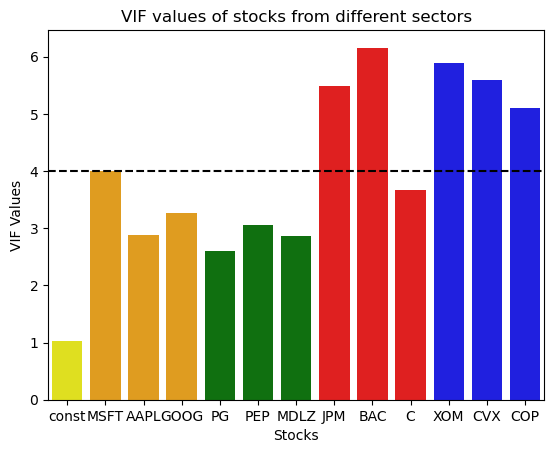

In [160]:
colors = ['yellow','orange','orange','orange','green','green','green','red','red','red','blue','blue','blue']
sns.barplot(x=vif_data['Variable'], y=vif_data['VIF'],palette=colors)
plt.axhline(y=4, color='black', linestyle='--', label='Threshold Line')
# Add labels and title
plt.xlabel('Stocks')
plt.ylabel('VIF Values')
plt.title('VIF values of stocks from different sectors')

# Show the plot
plt.show()

In [163]:
vif_data.round(3)

,Variable,VIF
0,const,1.023
1,MSFT,3.995
2,AAPL,2.876
3,GOOG,3.259
4,PG,2.596
5,PEP,3.052
6,MDLZ,2.867
7,JPM,5.483
8,BAC,6.158
9,C,3.673


/var/folders/fw/2spjt22j4cl4hbmqcrbg5gdr0000gn/T/ipykernel_13077/925341323.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette=colors)


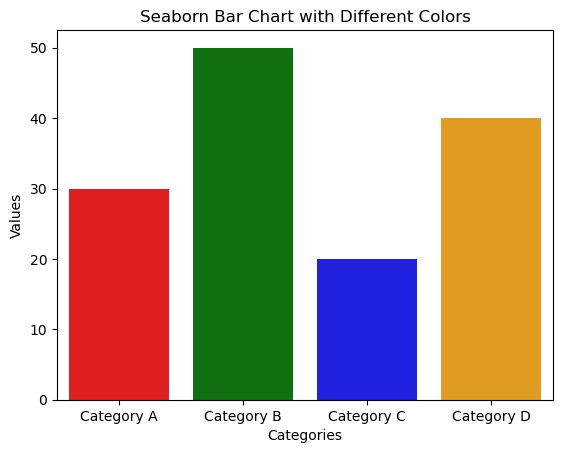

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [30, 50, 20, 40]

# Define colors for each category
colors = ['red', 'green', 'blue', 'orange']

# Create a bar chart with different colors using Seaborn
sns.barplot(x=categories, y=values, palette=colors)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Seaborn Bar Chart with Different Colors')

# Show the plot
plt.show()

In [183]:

# Calculate eigenvalues
eigenvalues = np.linalg.eigvals(correlation_matrix)
print('The eigenvalues, in descending order, are:\n',eigenvalues.round(3))

The eigenvalues, in descending order, are:
 [5.441 2.511 1.322 1.197 0.297 0.284 0.23  0.204 0.168 0.134 0.113 0.101]


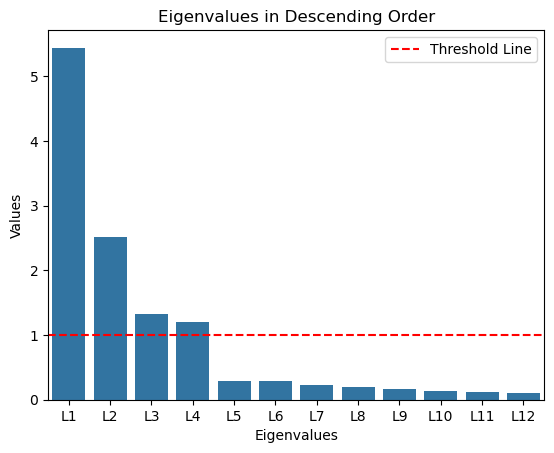

In [185]:
categories = ['L1', 'L2', 'L3', 'L4','L5','L6','L7','L8','L9','L10','L11','L12']
values = eigenvalues
plt.axhline(y=1, color='red', linestyle='--', label='Threshold Line')
# Define colors for each category


# Create a bar chart with different colors using Seaborn
sns.barplot(x=categories, y=values)

# Add labels and title
plt.xlabel('Eigenvalues')
plt.ylabel('Values')
plt.title('Eigenvalues in Descending Order')

# Show the plot
plt.show()

In [176]:
temp=0
for i in range(12):
    temp+=eigenvalues[i]
normalized_vector=eigenvalues/temp

print("Original Vector:", eigenvalues)
print("Normalized Vector:", normalized_vector)

Original Vector: [5.44056646 2.51059654 1.32168217 1.19716565 0.29676796 0.284204
 0.22968715 0.20421709 0.16770289 0.13399471 0.11284393 0.10057145]
Normalized Vector: [0.45338054 0.20921638 0.11014018 0.0997638  0.02473066 0.02368367
 0.0191406  0.01701809 0.01397524 0.01116623 0.00940366 0.00838095]


In [165]:
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=42)


In [168]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [172]:
n_components = 12

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
# X_test_pca = pca.transform(X_test_scaled)
print("Principal Components:")
print(pca.components_)

# Print explained variance ratio
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

Principal Components:
[[-0.29338901 -0.2961302  -0.2923621  -0.22882718 -0.25824779 -0.26708421
  -0.33138039 -0.34012101 -0.33333274 -0.2660507  -0.27222708 -0.26243073]
 [ 0.25222888  0.23545935  0.18929916  0.33827825  0.34085012  0.31232506
  -0.10741905 -0.14046278 -0.15055918 -0.40210528 -0.37897129 -0.39711809]
 [-0.40491443 -0.34015975 -0.45697359  0.43397575  0.35635982  0.3882338
  -0.01334553 -0.01994471 -0.06635497  0.10102226  0.09958529  0.14267599]
 [-0.18869604 -0.18234508 -0.15774199  0.01994255 -0.16383467 -0.04041013
   0.48849019  0.45286516  0.39478401 -0.30631779 -0.32347901 -0.28170173]
 [-0.23056606  0.52765822 -0.34238628 -0.60016414  0.18649372  0.36201183
   0.04766897 -0.00694939  0.03613628 -0.02057942  0.06593065 -0.12946603]
 [ 0.04260725 -0.58608692  0.4302746  -0.44297479  0.1247136   0.42300917
   0.05323916  0.10184508 -0.15739444 -0.0420451   0.14246304 -0.13707758]
 [ 0.02116935 -0.01781128  0.02371388  0.10034669 -0.54901293  0.49316677
  -0.353503

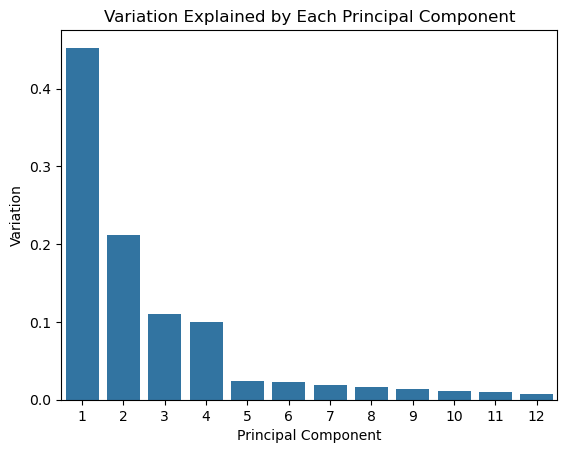

In [189]:
categories = ['1', '2', '3', '4','5','6','7','8','9','10','11','12']
values = pca.explained_variance_ratio_
# Define colors for each category


# Create a bar chart with different colors using Seaborn
sns.barplot(x=categories, y=values)

# Add labels and title
plt.xlabel('Principal Component')
plt.ylabel('Variation')
plt.title('Variation Explained by Each Principal Component')

# Show the plot
plt.show()

0.8748637812727079


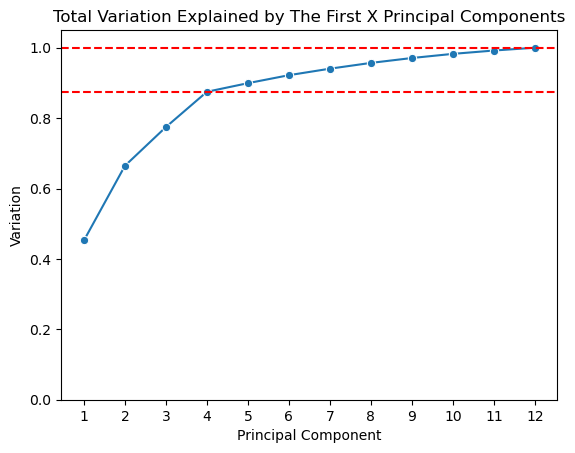

In [197]:
categories = ['1', '2', '3', '4','5','6','7','8','9','10','11','12']
values = pca.explained_variance_ratio_
# Define colors for each category

temp=0
values=[]
for i in range(12):
    temp+=pca.explained_variance_ratio_[i]
    values.append(temp)
# Create a bar chart with different colors using Seaborn
sns.lineplot(x=categories, y=values, marker='o', linestyle='-')
plt.ylim(0, 1.05)  # Adjust the range as needed
plt.axhline(y=1, color='red', linestyle='--', label='Threshold Line')
plt.axhline(y=0.8748637812727079, color='red', linestyle='--', label='Threshold Line')

print(values[3])
# Add labels and title
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variation')
plt.title('Total Variation Explained by The First X Principal Components')

# Show the plot
plt.show()

In [215]:
print('The Fourth Principal Component is')
print(pca.components_[3][0:3].round(4))
print(pca.components_[3][3:6].round(4))
print(pca.components_[3][6:9].round(4))
print(pca.components_[3][9:12].round(4))

The Fourth Principal Component is
[-0.1887 -0.1823 -0.1577]
[ 0.0199 -0.1638 -0.0404]
[0.4885 0.4529 0.3948]
[-0.3063 -0.3235 -0.2817]


In [412]:
aic=[[] for _ in range(12)]
bic=[[] for _ in range(12)]
ar2=[[] for _ in range(12)]
for j in range(1,13): 
    print(j)
    for i in range(10000):
        X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2,random_state=42)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        n_components = j
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train_scaled)
        X_test_pca = pca.transform(X_test_scaled)
        model = sm.OLS(y_train, sm.add_constant(X_train_pca)).fit()
        aic[j-1].append(model.aic)
        bic[j-1].append(model.bic)
        ar2[j-1].append(model.rsquared_adj)


1
2
3


KeyboardInterrupt: 

In [415]:
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
n_components = 4
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
model = sm.OLS(y_train, sm.add_constant(X_train_pca)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1068.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          1.40e-210
Time:                        00:03:21   Log-Likelihood:                 1682.9
No. Observations:                 401   AIC:                            -3356.
Df Residuals:                     396   BIC:                            -3336.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.000     -2.283      0.0

In [416]:
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
n_components = 9
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
model = sm.OLS(y_train, sm.add_constant(X_train_pca)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     503.7
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          5.83e-209
Time:                        00:03:21   Log-Likelihood:                 1696.3
No. Observations:                 401   AIC:                            -3373.
Df Residuals:                     391   BIC:                            -3333.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.000     -2.345      0.0

In [254]:
aic=[[] for _ in range(12)]

In [258]:
import statistics

In [259]:
aic_mean=[]
bic_mean=[]
ar2_mean=[]
for i in range(12):
    aic_mean.append(statistics.mean(aic[i]))
    bic_mean.append(statistics.mean(bic[i]))
    ar2_mean.append(statistics.mean(ar2[i]))
    

In [260]:
aic_mean

[-3022.400817766767,
 -3143.940058774745,
 -3343.427418614662,
 -3382.9596182905984,
 -3385.1503136866095,
 -3385.73413772963,
 -3385.3637277245175,
 -3389.1013650400314,
 -3394.753424037478,
 -3393.742723528586,
 -3393.001278765831,
 -3393.746060727872]

In [261]:
bic_mean

[-3014.4128949121537,
 -3131.9581744928255,
 -3327.451572905436,
 -3362.9898111540656,
 -3361.18654512277,
 -3357.776407738484,
 -3353.412036306065,
 -3353.1557121942724,
 -3354.8138097644123,
 -3349.8091478282136,
 -3345.073741638152,
 -3341.824562172887]

In [262]:
ar2_mean

[0.7930192638594518,
 0.8475453574303411,
 0.9071998448719116,
 0.9164023946671442,
 0.9170300879763245,
 0.9173729499931357,
 0.917488970227685,
 0.9185429514569238,
 0.9197999024854653,
 0.9198502133253664,
 0.919805862975132,
 0.9202689620645876]

-3382.9596182905984


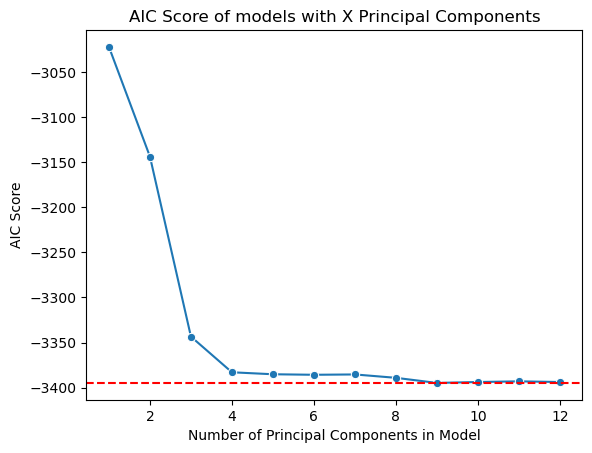

In [269]:
categories = [1,2,3,4,5,6,7,8,9,10,11,12]


values=aic_mean

# Create a bar chart with different colors using Seaborn
sns.lineplot(y=values,x=categories, marker='o', linestyle='-')
plt.axhline(y=-3394.753424037478, color='red', linestyle='--', label='Threshold Line')

print(values[3])
# Add labels and title
plt.xlabel('Number of Principal Components in Model')
plt.ylabel('AIC Score')
plt.title('AIC Score of models with X Principal Components')

# Show the plot
plt.show()

-3362.9898111540656


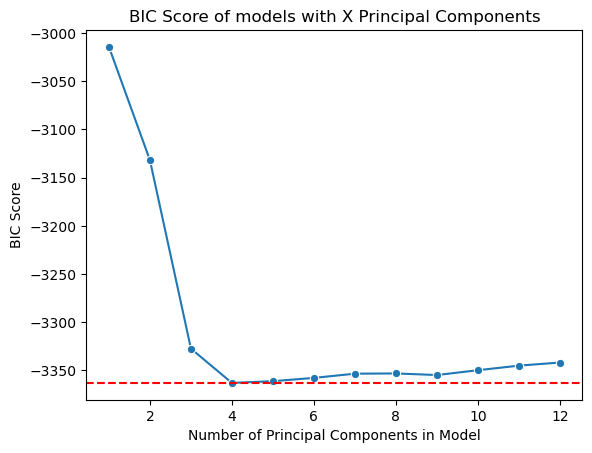

In [271]:
categories = [1,2,3,4,5,6,7,8,9,10,11,12]


values=bic_mean

# Create a bar chart with different colors using Seaborn
sns.lineplot(y=values,x=categories, marker='o', linestyle='-')
plt.axhline(y=-3362.9898111540656, color='red', linestyle='--', label='Threshold Line')

print(values[3])
# Add labels and title
plt.xlabel('Number of Principal Components in Model')
plt.ylabel('BIC Score')
plt.title('BIC Score of models with X Principal Components')

# Show the plot
plt.show()

0.9164023946671442


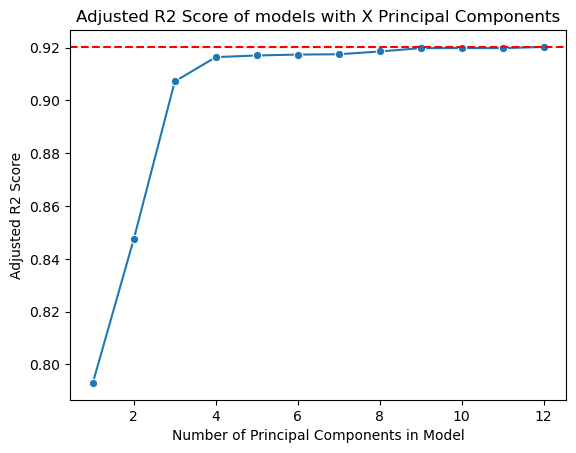

In [273]:
categories = [1,2,3,4,5,6,7,8,9,10,11,12]


values=ar2_mean

# Create a bar chart with different colors using Seaborn
sns.lineplot(y=values,x=categories, marker='o', linestyle='-')
plt.axhline(y=0.9202689620645876, color='red', linestyle='--', label='Threshold Line')

print(values[3])
# Add labels and title
plt.xlabel('Number of Principal Components in Model')
plt.ylabel('Adjusted R2 Score')
plt.title('Adjusted R2 Score of models with X Principal Components')

# Show the plot
plt.show()

In [371]:
t=200
alpha=[]
r2_mean=[]
mse_mean=[]
my_list = np.arange(-6, -2, 0.02).tolist()
for j in my_list:
    alpha.append(10**(j))
for j in alpha: 
    r2=0
    mse=0
    for i in range(t):
        X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2)
        X_train = sm.add_constant(X_train)
        X_test = sm.add_constant(X_test)

        ridge_model_stats = sm.OLS(y_train, X_train).fit_regularized(alpha=j)
        y_pred = ridge_model_stats.predict(X_test)

        r2 += r2_score(y_test, y_pred)
        mse+= mean_squared_error(y_test, y_pred)
    print(mse/t)
    r2_mean.append(r2/t)
    mse_mean.append(mse/t)


1.2692369253714216e-05
1.3182092119981706e-05
1.2541729231757896e-05
1.2860013625105536e-05
1.2798726437745978e-05
1.2827628713740108e-05
1.3143576993689177e-05
1.2633522355608689e-05
1.3029277633402239e-05
1.258370432588864e-05
1.2784973344702943e-05
1.2817747820261053e-05
1.2752083662020333e-05
1.27101048735024e-05
1.293616987553001e-05
1.3046803844932533e-05
1.2771300062310365e-05
1.3028635621671078e-05
1.2843027734130456e-05
1.2840442688440795e-05
1.3075387816278836e-05
1.3099683546686346e-05
1.3120203194850566e-05
1.2671126223462297e-05
1.2866170423400613e-05
1.30590110772864e-05
1.282239752737329e-05
1.2723898781418836e-05
1.311742125988306e-05
1.3146383337265702e-05
1.2878943310363259e-05
1.329076629847307e-05
1.336180998729831e-05
1.3480946718828437e-05
1.3440829348993408e-05
1.33953736414311e-05
1.3201167886357122e-05
1.369387749159813e-05
1.327651879418399e-05
1.3336974624224476e-05
1.3298678920445059e-05
1.352839767039718e-05
1.3521857341927066e-05
1.344921590675273e-05
1.33

In [372]:

r2_mean

[0.9121294176662468,
 0.9113046514311839,
 0.915338494581908,
 0.9117310668447282,
 0.9113564219595357,
 0.912568938131372,
 0.9100493429553389,
 0.912215483120779,
 0.911033161367887,
 0.914617359525232,
 0.9123805930650688,
 0.9111933901768685,
 0.911834438361576,
 0.913920943070345,
 0.9116214610320372,
 0.9096013128479047,
 0.9119121178966675,
 0.912335580246554,
 0.9101563594041271,
 0.9117831257850193,
 0.911105650151636,
 0.9086807764339184,
 0.9091427170737315,
 0.9124913426764861,
 0.9103361208747907,
 0.9111263579671427,
 0.91228253484682,
 0.9119435670412841,
 0.9081148742271019,
 0.9091657308757636,
 0.9123193407859154,
 0.9104146349200982,
 0.9077454459820039,
 0.9074353868547429,
 0.9076643679350284,
 0.9098597826628897,
 0.9085283599219419,
 0.9066019993673089,
 0.9073483185658927,
 0.9098565118005656,
 0.9078178113960328,
 0.907323633322784,
 0.905801931913606,
 0.9091246944204454,
 0.9095223274755078,
 0.9048715967346113,
 0.9074845512898183,
 0.9085928727970416,
 0.90

In [373]:

mse_mean

[1.2692369253714216e-05,
 1.3182092119981706e-05,
 1.2541729231757896e-05,
 1.2860013625105536e-05,
 1.2798726437745978e-05,
 1.2827628713740108e-05,
 1.3143576993689177e-05,
 1.2633522355608689e-05,
 1.3029277633402239e-05,
 1.258370432588864e-05,
 1.2784973344702943e-05,
 1.2817747820261053e-05,
 1.2752083662020333e-05,
 1.27101048735024e-05,
 1.293616987553001e-05,
 1.3046803844932533e-05,
 1.2771300062310365e-05,
 1.3028635621671078e-05,
 1.2843027734130456e-05,
 1.2840442688440795e-05,
 1.3075387816278836e-05,
 1.3099683546686346e-05,
 1.3120203194850566e-05,
 1.2671126223462297e-05,
 1.2866170423400613e-05,
 1.30590110772864e-05,
 1.282239752737329e-05,
 1.2723898781418836e-05,
 1.311742125988306e-05,
 1.3146383337265702e-05,
 1.2878943310363259e-05,
 1.329076629847307e-05,
 1.336180998729831e-05,
 1.3480946718828437e-05,
 1.3440829348993408e-05,
 1.33953736414311e-05,
 1.3201167886357122e-05,
 1.369387749159813e-05,
 1.327651879418399e-05,
 1.3336974624224476e-05,
 1.32986789204

0.9117310668447282


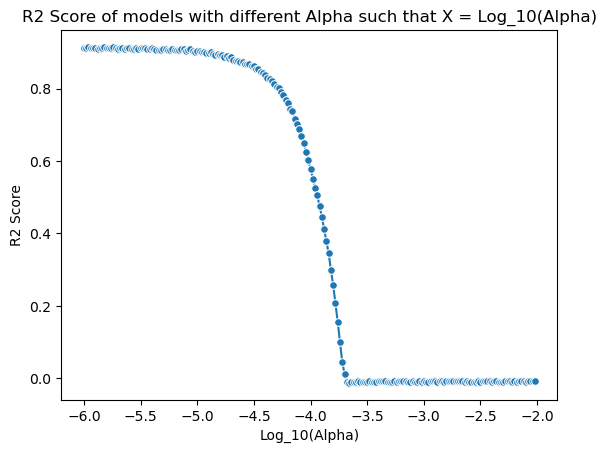

200

In [401]:

categories = my_list

values=r2_mean

# Create a bar chart with different colors using Seaborn
sns.lineplot(y=values,x=categories, marker='o',markersize=5.5, linestyle='-')
# plt.axhline(y=0.9202689620645876, color='red', linestyle='--', label='Threshold Line')

print(values[3])
# Add labels and title
plt.xlabel('Log_10(Alpha)')
plt.ylabel('R2 Score')
plt.title('R2 Score of models with different Alpha such that X = Log_10(Alpha)')

# Show the plot
plt.show()
len(my_list)

1.2860013625105536e-05


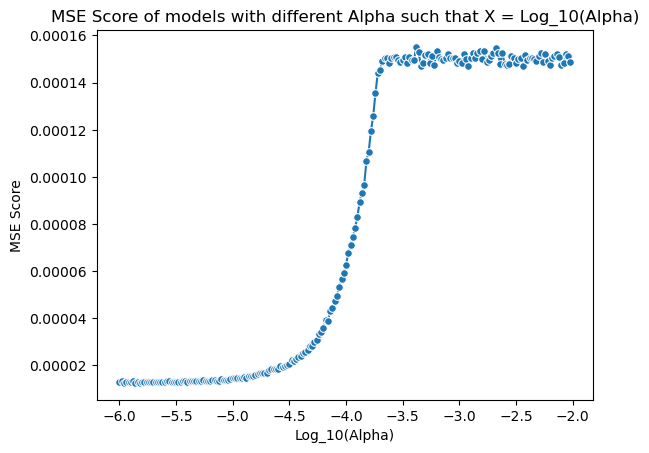

200

In [400]:

categories = my_list

values=mse_mean

# Create a bar chart with different colors using Seaborn
sns.lineplot(y=values,x=categories, marker='o',markersize=5.5, linestyle='-')
# plt.axhline(y=0.9202689620645876, color='red', linestyle='--', label='Threshold Line')

print(values[3])
# Add labels and title
plt.xlabel('Log_10(Alpha)')
plt.ylabel('MSE Score')
plt.title('MSE Score of models with different Alpha such that X = Log_10(Alpha)')

# Show the plot
plt.show()
len(my_list)

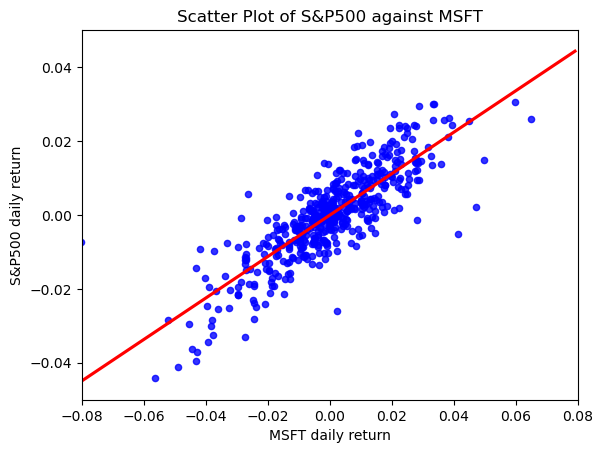

In [418]:
plt.xlim(-0.08,0.08)
plt.ylim(-0.05, 0.05)
x = list11

name1='MSFT'

y = Y

name2='S&P500'
# Create a scatter plot using Seaborn
sns.regplot(x=x, y=y, ci=None ,scatter_kws={'color': 'blue', 's':20}, line_kws={'color': 'red'})

# Add labels and a title
plt.xlabel(f'{name1} daily return')
plt.ylabel(f'{name2} daily return')
plt.title(f'Scatter Plot of {name2} against {name1}')

# Display the plot
plt.show()

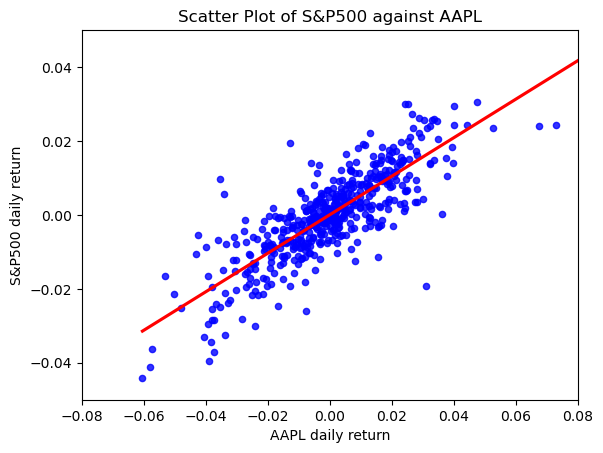

In [419]:
plt.xlim(-0.08,0.08)
plt.ylim(-0.05, 0.05)

x = list12

name1='AAPL'

y = Y

name2='S&P500'
# Create a scatter plot using Seaborn
sns.regplot(x=x, y=y, ci=None ,scatter_kws={'color': 'blue', 's':20}, line_kws={'color': 'red'})

# Add labels and a title
plt.xlabel(f'{name1} daily return')
plt.ylabel(f'{name2} daily return')
plt.title(f'Scatter Plot of {name2} against {name1}')

# Display the plot
plt.show()

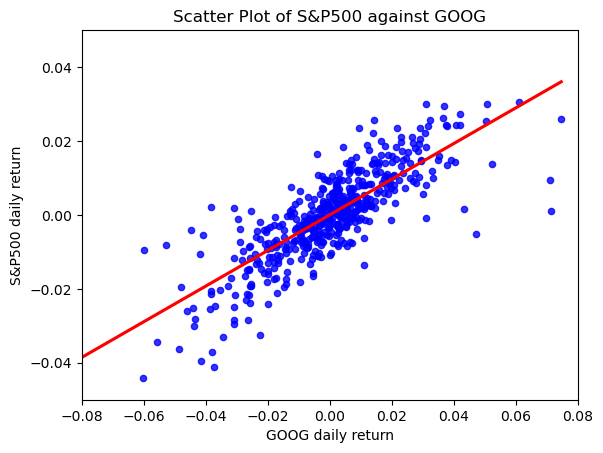

In [420]:
plt.xlim(-0.08,0.08)
plt.ylim(-0.05, 0.05)

x = list13

name1='GOOG'

y = Y

name2='S&P500'
# Create a scatter plot using Seaborn
sns.regplot(x=x, y=y, ci=None ,scatter_kws={'color': 'blue', 's':20}, line_kws={'color': 'red'})

# Add labels and a title
plt.xlabel(f'{name1} daily return')
plt.ylabel(f'{name2} daily return')
plt.title(f'Scatter Plot of {name2} against {name1}')

# Display the plot
plt.show()

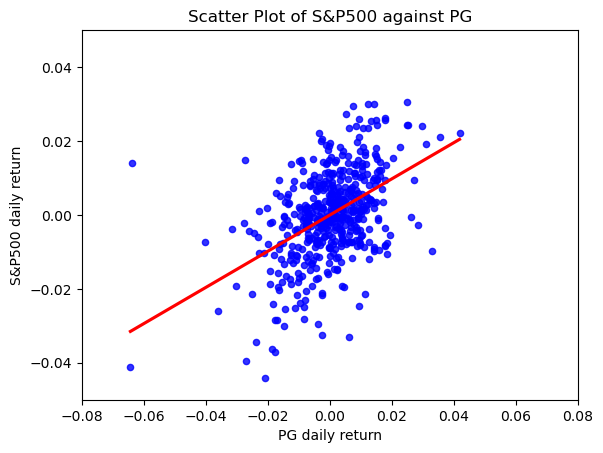

In [421]:
x = list21

name1='PG'

plt.xlim(-0.08,0.08)
plt.ylim(-0.05, 0.05)

y = Y

name2='S&P500'
# Create a scatter plot using Seaborn
sns.regplot(x=x, y=y, ci=None ,scatter_kws={'color': 'blue', 's':20}, line_kws={'color': 'red'})

# Add labels and a title
plt.xlabel(f'{name1} daily return')
plt.ylabel(f'{name2} daily return')
plt.title(f'Scatter Plot of {name2} against {name1}')

# Display the plot
plt.show()

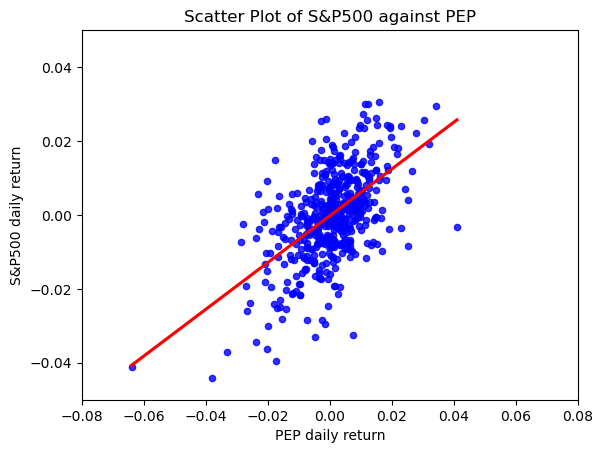

In [422]:
x = list22

name1='PEP'

y = Y

plt.xlim(-0.08,0.08)
plt.ylim(-0.05, 0.05)
name2='S&P500'
# Create a scatter plot using Seaborn
sns.regplot(x=x, y=y, ci=None ,scatter_kws={'color': 'blue', 's':20}, line_kws={'color': 'red'})

# Add labels and a title
plt.xlabel(f'{name1} daily return')
plt.ylabel(f'{name2} daily return')
plt.title(f'Scatter Plot of {name2} against {name1}')

# Display the plot
plt.show()

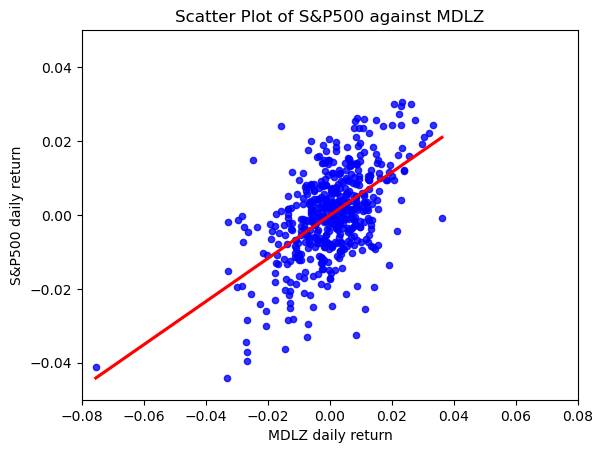

In [423]:
x = list23

name1='MDLZ'

plt.xlim(-0.08,0.08)
plt.ylim(-0.05, 0.05)

y = Y

name2='S&P500'
# Create a scatter plot using Seaborn
sns.regplot(x=x, y=y, ci=None ,scatter_kws={'color': 'blue', 's':20}, line_kws={'color': 'red'})

# Add labels and a title
plt.xlabel(f'{name1} daily return')
plt.ylabel(f'{name2} daily return')
plt.title(f'Scatter Plot of {name2} against {name1}')

# Display the plot
plt.show()

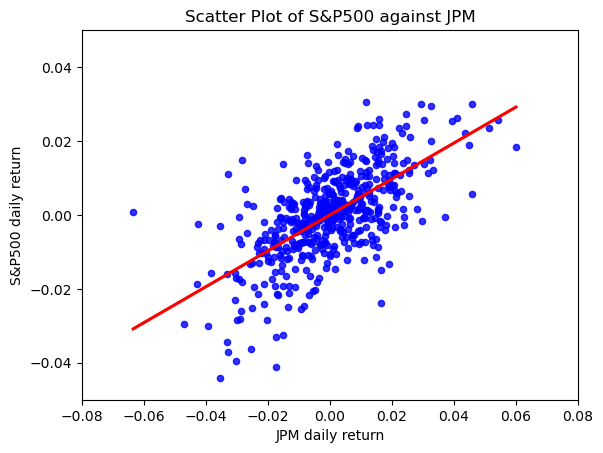

In [424]:
x = list31

name1='JPM'

plt.xlim(-0.08,0.08)
plt.ylim(-0.05, 0.05)

y = Y

name2='S&P500'
# Create a scatter plot using Seaborn
sns.regplot(x=x, y=y, ci=None ,scatter_kws={'color': 'blue', 's':20}, line_kws={'color': 'red'})

# Add labels and a title
plt.xlabel(f'{name1} daily return')
plt.ylabel(f'{name2} daily return')
plt.title(f'Scatter Plot of {name2} against {name1}')

# Display the plot
plt.show()

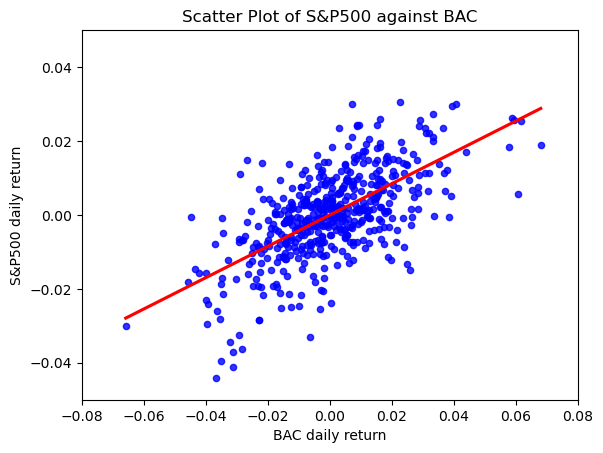

In [425]:
x = list32

name1='BAC'

plt.xlim(-0.08,0.08)
plt.ylim(-0.05, 0.05)

y = Y

name2='S&P500'
# Create a scatter plot using Seaborn
sns.regplot(x=x, y=y, ci=None ,scatter_kws={'color': 'blue', 's':20}, line_kws={'color': 'red'})

# Add labels and a title
plt.xlabel(f'{name1} daily return')
plt.ylabel(f'{name2} daily return')
plt.title(f'Scatter Plot of {name2} against {name1}')

# Display the plot
plt.show()

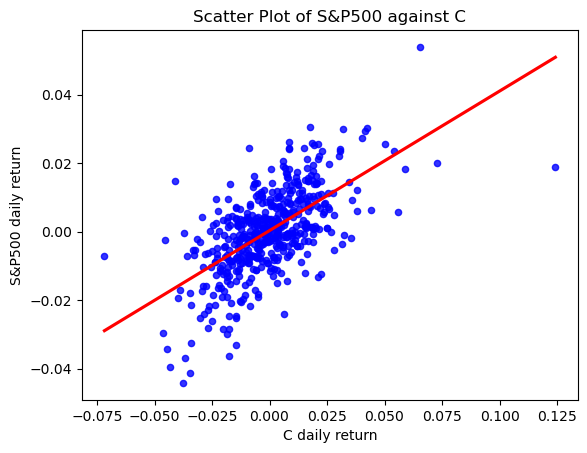

In [382]:
x = list33

name1='C'

y = Y

name2='S&P500'
# Create a scatter plot using Seaborn
sns.regplot(x=x, y=y, ci=None ,scatter_kws={'color': 'blue', 's':20}, line_kws={'color': 'red'})

# Add labels and a title
plt.xlabel(f'{name1} daily return')
plt.ylabel(f'{name2} daily return')
plt.title(f'Scatter Plot of {name2} against {name1}')

# Display the plot
plt.show()

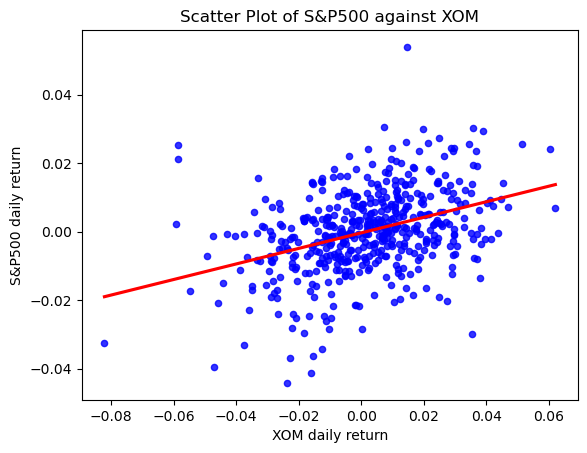

In [383]:
x = list1

name1='XOM'

y = Y

name2='S&P500'
# Create a scatter plot using Seaborn
sns.regplot(x=x, y=y, ci=None ,scatter_kws={'color': 'blue', 's':20}, line_kws={'color': 'red'})

# Add labels and a title
plt.xlabel(f'{name1} daily return')
plt.ylabel(f'{name2} daily return')
plt.title(f'Scatter Plot of {name2} against {name1}')

# Display the plot
plt.show()

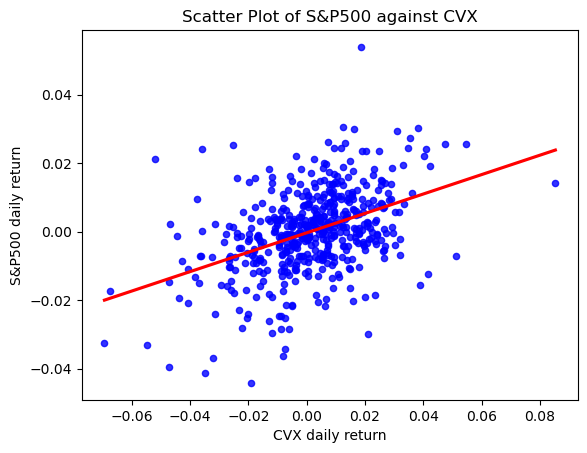

In [384]:
x = list2

name1='CVX'

y = Y

name2='S&P500'
# Create a scatter plot using Seaborn
sns.regplot(x=x, y=y, ci=None ,scatter_kws={'color': 'blue', 's':20}, line_kws={'color': 'red'})

# Add labels and a title
plt.xlabel(f'{name1} daily return')
plt.ylabel(f'{name2} daily return')
plt.title(f'Scatter Plot of {name2} against {name1}')

# Display the plot
plt.show()

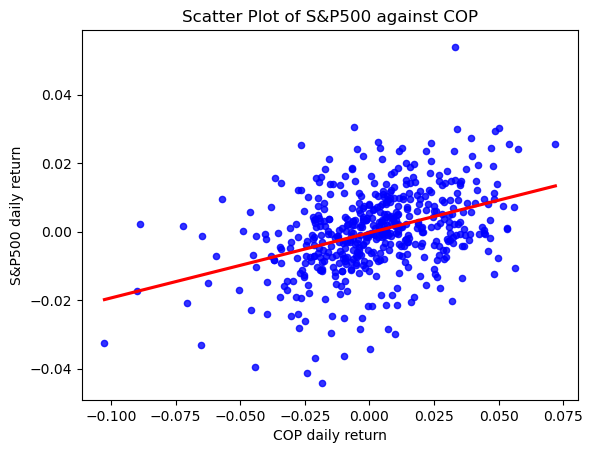

In [385]:
x = list3

name1='COP'

y = Y

name2='S&P500'
# Create a scatter plot using Seaborn
sns.regplot(x=x, y=y, ci=None ,scatter_kws={'color': 'blue', 's':20}, line_kws={'color': 'red'})

# Add labels and a title
plt.xlabel(f'{name1} daily return')
plt.ylabel(f'{name2} daily return')
plt.title(f'Scatter Plot of {name2} against {name1}')

# Display the plot
plt.show()

In [409]:
X = df[['JPM']]
X_with_intercept = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X_with_intercept).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     364.9
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.72e-61
Time:                        23:56:21   Log-Likelihood:                 1635.1
No. Observations:                 502   AIC:                            -3266.
Df Residuals:                     500   BIC:                            -3258.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.205e-05      0.000      0.029      0.9

In [410]:
X = df[['BAC']]
X_with_intercept = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X_with_intercept).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     339.1
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           3.39e-58
Time:                        23:56:21   Log-Likelihood:                 1627.5
No. Observations:                 502   AIC:                            -3251.
Df Residuals:                     500   BIC:                            -3243.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.309e-06      0.000     -0.022      0.9

In [411]:
X = df[['JPM','BAC']]
X_with_intercept = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X_with_intercept).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     193.8
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           5.36e-63
Time:                        23:56:22   Log-Likelihood:                 1641.8
No. Observations:                 502   AIC:                            -3278.
Df Residuals:                     499   BIC:                            -3265.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.934e-07      0.000     -0.001      0.9

In [ ]:
t=200
alpha=[]
r2_mean=[]
mse_mean=[]
my_list = np.arange(-6, -2, 0.02).tolist()
for j in my_list:
    alpha.append(10**(j))
for j in alpha: 
    r2=0
    mse=0
    for i in range(t):
        X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2)
        X_train = sm.add_constant(X_train)
        X_test = sm.add_constant(X_test)

        ridge_model_stats = sm.OLS(y_train, X_train).fit_regularized(alpha=j)
        y_pred = ridge_model_stats.predict(X_test)

        r2 += r2_score(y_test, y_pred)
        mse+= mean_squared_error(y_test, y_pred)
    print(mse/t)
    r2_mean.append(r2/t)
    mse_mean.append(mse/t)

In [417]:
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
ridge_model_stats = sm.OLS(y_train, X_train).fit_regularized(alpha=10**(-6))
y_pred = ridge_model_stats.predict(X_test)
print(ridge_model_stats.summary())

NotImplementedError: 

In [427]:
X = df[['MSFT','PG','JPM','XOM']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train).fit()



# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     592.7
Date:                Mon, 04 Dec 2023   Prob (F-statistic):          1.16e-165
Time:                        10:35:17   Log-Likelihood:                 1598.7
No. Observations:                 401   AIC:                            -3187.
Df Residuals:                     396   BIC:                            -3167.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -0.918      0.3